## COVID-19
### Italy, data source:  https://github.com/pcm-dpc/COVID-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#### gathering data from https://github.com/pcm-dpc/COVID-19

In [2]:
df_italy = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
df_italy.tail(3)

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
28,2020-03-23T17:00:00,ITA,20692,3204,23896,26522,50418,3780,7432,6077,63927,275468,NaN,NaN
29,2020-03-24T17:00:00,ITA,21937,3396,25333,28697,54030,3612,8326,6820,69176,296964,NaN,NaN
30,2020-03-25T17:00:00,ITA,23112,3489,26601,30920,57521,3491,9362,7503,74386,324445,NaN,NaN


In [5]:
df_italy = df_italy.rename(columns={'data':'date', 'stato':'country', 'ricoverati_con_sintomi':'hospitalized', 'terapia_intensiva':'ICU',
                         'totale_ospedalizzati':'hospitalized_total',
                         'isolamento_domiciliare':'home_confinement',
                         'totale_attualmente_positivi':'confirmed_active',
                         'nuovi_attualmente_positivi':'confirmed_new',
                         'dimessi_guariti':'recovered',
                         'deceduti':'deaths',
                         'totale_casi':'confirmed',
                         'tamponi':'tests'
                        })
df_italy['date'] = pd.to_datetime(df_italy.date)
df_italy = df_italy.set_index('date')
df_italy

,country,hospitalized,ICU,hospitalized_total,home_confinement,confirmed_active,confirmed_new,recovered,deaths,confirmed,tests
date,,,,,,,,,,,
2020-02-24 18:00:00,ITA,101,26,127,94,221,221,1,7,229,4324
2020-02-25 18:00:00,ITA,114,35,150,162,311,90,1,10,322,8623
2020-02-26 18:00:00,ITA,128,36,164,221,385,74,3,12,400,9587
2020-02-27 18:00:00,ITA,248,56,304,284,588,203,45,17,650,12014
2020-02-28 18:00:00,ITA,345,64,409,412,821,233,46,21,888,15695
2020-02-29 18:00:00,ITA,401,105,506,543,1049,228,50,29,1128,18661
2020-03-01 18:00:00,ITA,639,140,779,798,1577,528,83,34,1694,21127
2020-03-02 18:00:00,ITA,742,166,908,927,1835,258,149,52,2036,23345
2020-03-03 18:00:00,ITA,1034,229,1263,1000,2263,428,160,79,2502,25856


In [6]:
df_italy_regions = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-regioni/dpc-covid19-ita-regioni.csv', parse_dates=['data'])
df_italy_regions = df_italy_regions.rename(columns={'data':'date', 'stato':'country', 'ricoverati_con_sintomi':'hospitalized', 'terapia_intensiva':'ICU',
                         'totale_ospedalizzati':'hospitalized_total',
                         'isolamento_domiciliare':'home_confinement',
                         'totale_attualmente_positivi':'confirmed_active',
                         'nuovi_attualmente_positivi':'confirmed_new',
                         'dimessi_guariti':'recovered',
                         'deceduti':'deaths',
                         'totale_casi':'confirmed',
                         'tamponi':'tests',
                         'codice_regione':'region_code',
                         'denominazione_regione':'region'            
                        })
df_italy_regions = df_italy_regions.set_index(['region','date'])
df_italy_regions

,,country,region_code,lat,long,hospitalized,ICU,hospitalized_total,home_confinement,confirmed_active,confirmed_new,recovered,deaths,confirmed,tests
region,date,,,,,,,,,,,,,,
Abruzzo,2020-02-24 18:00:00,ITA,13,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
Basilicata,2020-02-24 18:00:00,ITA,17,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
P.A. Bolzano,2020-02-24 18:00:00,ITA,4,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
Calabria,2020-02-24 18:00:00,ITA,18,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
Campania,2020-02-24 18:00:00,ITA,15,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toscana,2020-03-23 17:00:00,ITA,9,43.769231,11.255889,838,238,1076,1225,2301,157,51,109,2461,13851
P.A. Trento,2020-03-23 17:00:00,ITA,4,46.068935,11.121231,249,46,295,619,914,29,68,41,1023,3150
Umbria,2020-03-23 17:00:00,ITA,10,43.106758,12.388247,106,42,148,408,556,56,5,16,577,3561


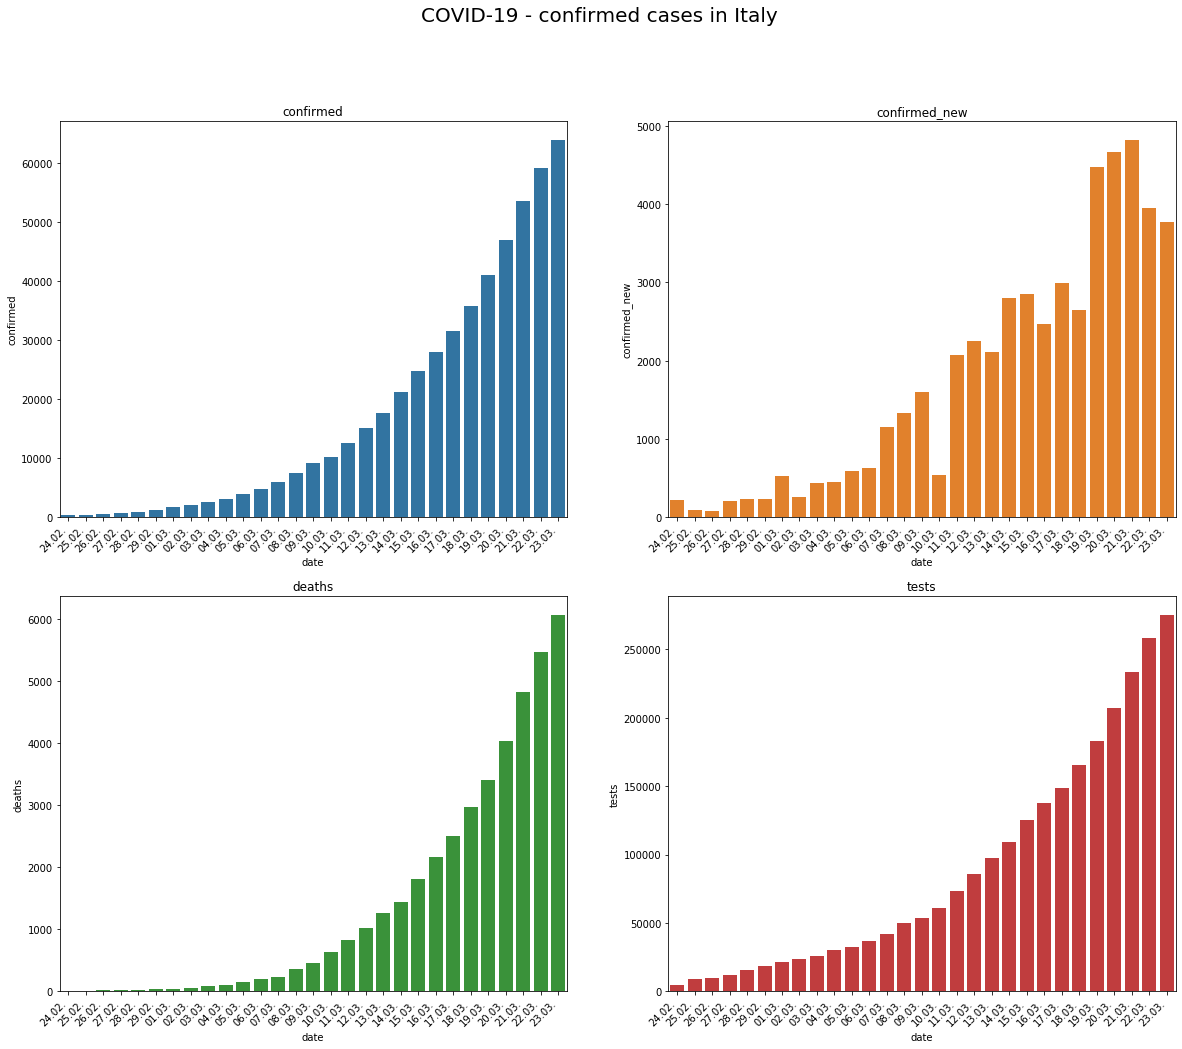

In [7]:
fig, ax = plt.subplots(2,2,figsize=(20,16))
for i, ctype in enumerate(['confirmed', 'confirmed_new', 'deaths', 'tests'], 1):
    plt.subplot(2,2,i)
    ax = sns.barplot(data=df_italy, x=df_italy.index, y=ctype, color=str('C' + str(i-1)))
    xticks = [xdate.strftime('%d.%m.') for xdate in df_italy.index]
    _ =ax.set_xticklabels(xticks, rotation=45, ha='right')
    _ = ax.set_title(ctype)
_ = plt.suptitle('COVID-19 - confirmed cases in Italy',fontsize=20)



In [8]:
df_italy_regions.groupby(level=0).confirmed.max().sort_values(ascending=False)

region
Lombardia                28761
Emilia Romagna            8535
Veneto                    5505
Piemonte                  4861
Marche                    2569
Toscana                   2461
Liguria                   1924
Lazio                     1540
Campania                  1026
P.A. Trento               1023
Friuli Venezia Giulia      930
Puglia                     906
P.A. Bolzano               724
Sicilia                    721
Abruzzo                    663
Umbria                     577
Valle d'Aosta              393
Sardegna                   359
Calabria                   292
Basilicata                  90
Molise                      67
Name: confirmed, dtype: int64

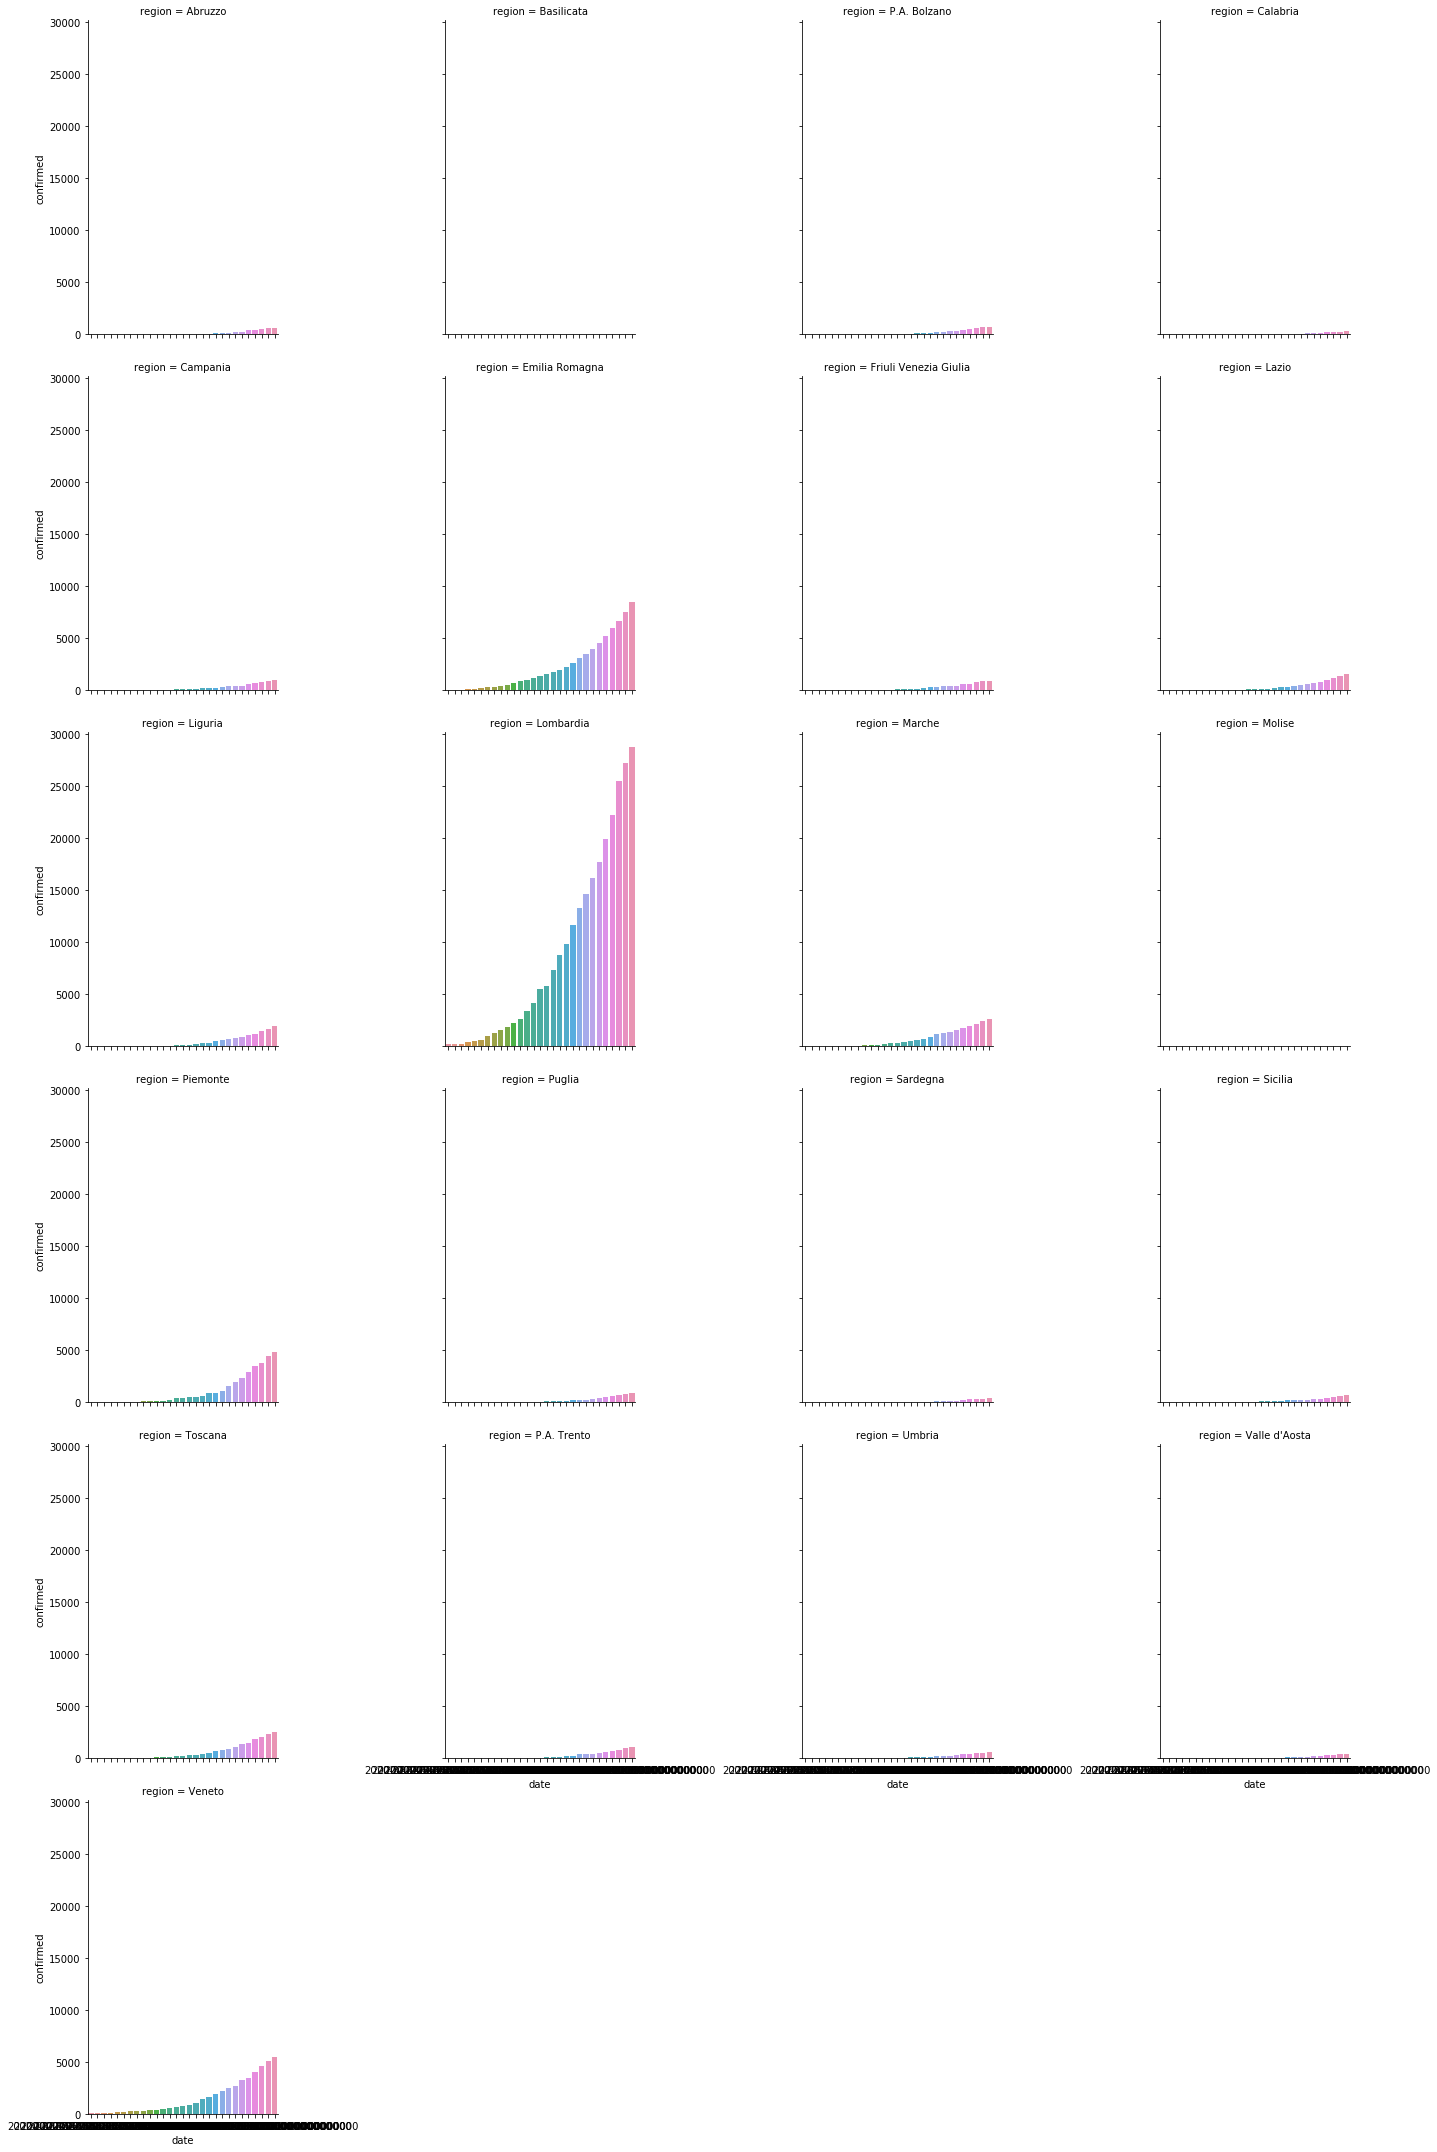

In [9]:
sns.catplot(kind='bar', data=df_italy_regions.reset_index(), x='date', y='confirmed', col='region', col_wrap=4, facet_kws={'sharey':False})